Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

 Load Dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


(284807, 31)
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64
Class
0    284315
1       492
Name: count, dtype: int64


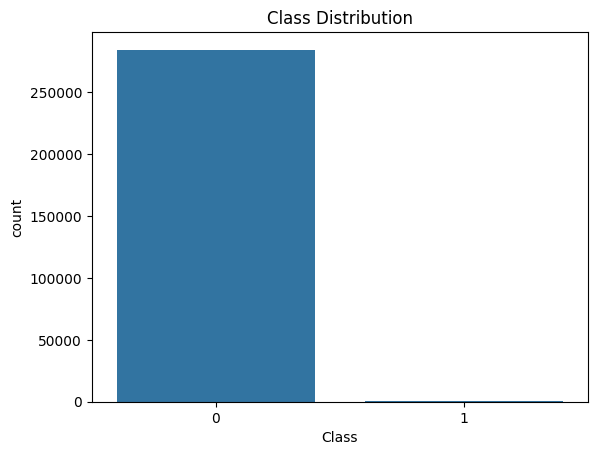

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/creditcard.csv")
display(df.head())


print(df.shape)
print(df.isnull().sum())
print(df['Class'].value_counts())
sns.countplot(x='Class', data=df)
plt.title("Class Distribution")
plt.show()


Preprocessing

In [ ]:
scaler = StandardScaler()
df['Amount'] = scaler.fit_transform(df[['Amount']])
df = df.drop(['Time'], axis=1)

X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


 Handle Imbalance with SMOTE

Class
0    199020
1       344
Name: count, dtype: int64
Class
0    199020
1    199020
Name: count, dtype: int64


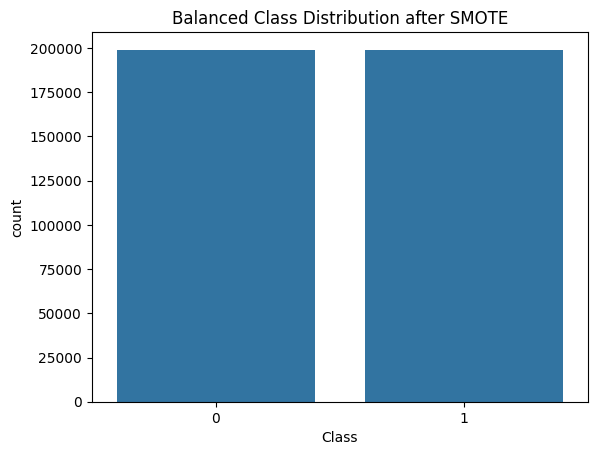

In [ ]:
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

print(y_train.value_counts())
print(pd.Series(y_train_sm).value_counts())
sns.countplot(x=y_train_sm)
plt.title("Balanced Class Distribution after SMOTE")
plt.show()

Train Models

In [ ]:
# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_sm, y_train_sm)

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_sm, y_train_sm)

# XGBoost
xgb = XGBClassifier(eval_metric='logloss')
xgb.fit(X_train_sm, y_train_sm)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

 Evaluate Models


In [ ]:
models = {'Logistic Regression': lr, 'Random Forest': rf, 'XGBoost': xgb}

for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"\n{name} Evaluation:")
    print("Accuracy :", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall   :", recall_score(y_test, y_pred))
    print("F1 Score :", f1_score(y_test, y_pred))
    print("ROC AUC  :", roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))



Logistic Regression Evaluation:
Accuracy : 0.9767681378228761
Precision: 0.061993323795898905
Recall   : 0.8783783783783784
F1 Score : 0.11581291759465479
ROC AUC  : 0.9676177115036368

Random Forest Evaluation:
Accuracy : 0.9994148145547324
Precision: 0.8656716417910447
Recall   : 0.7837837837837838
F1 Score : 0.8226950354609929
ROC AUC  : 0.9682323113898821

XGBoost Evaluation:
Accuracy : 0.99916903666772
Precision: 0.7361963190184049
Recall   : 0.8108108108108109
F1 Score : 0.7717041800643086
ROC AUC  : 0.9705303374774036


Confusion Matrices


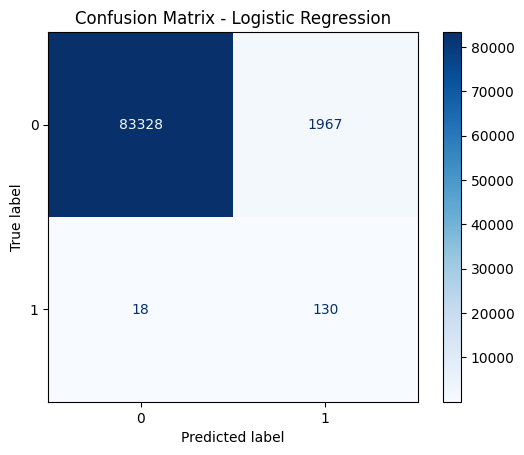

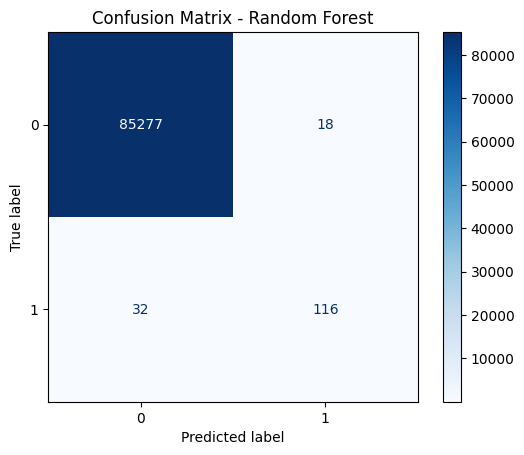

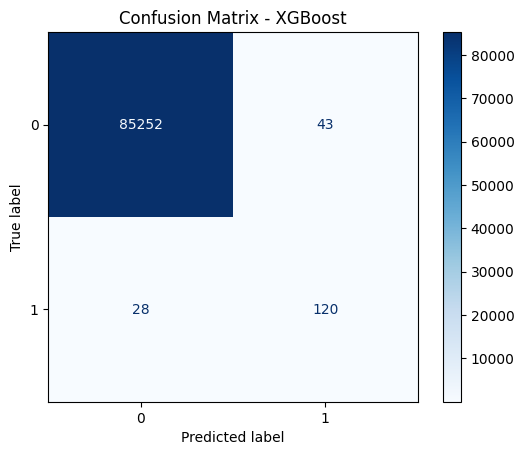

In [ ]:
for name, model in models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title(f"Confusion Matrix - {name}")
    plt.show()


 ROC Curve

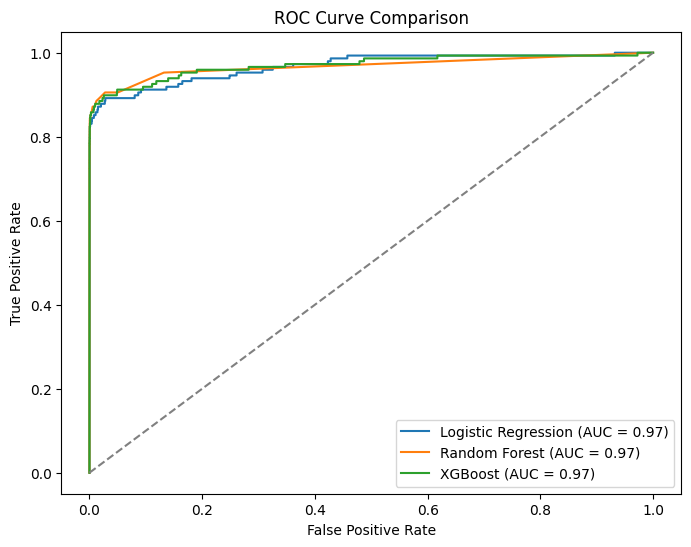

In [ ]:
def plot_roc(model, X_test, y_test, name):
    y_score = model.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_score)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc_score(y_test, y_score):.2f})')

plt.figure(figsize=(8,6))
plot_roc(lr, X_test, y_test, 'Logistic Regression')
plot_roc(rf, X_test, y_test, 'Random Forest')
plot_roc(xgb, X_test, y_test, 'XGBoost')

plt.plot([0,1], [0,1], linestyle='--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()


Feature Selection Anova

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

# Separate features and target
X = df.drop(columns=['Class'])
y = df['Class']

# Apply ANOVA F-test
anova_selector = SelectKBest(score_func=f_classif, k='all')
anova_selector.fit(X, y)

# Create DataFrame of feature scores
anova_scores = pd.DataFrame({
    'Feature': X.columns,
    'ANOVA_F_Score': anova_selector.scores_
})

# Sort by F-score descending
anova_scores = anova_scores.sort_values(by='ANOVA_F_Score', ascending=False)

# Display ranked features
print(anova_scores)

# Save results for your report
anova_scores.to_csv("anova_feature_scores.csv", index=False)
print("\nANOVA feature scores saved to anova_feature_scores.csv")


   Feature  ANOVA_F_Score
16     V17   33979.168593
13     V14   28695.547788
11     V12   20749.822361
9      V10   14057.979985
15     V16   11443.349428
2       V3   11014.508305
6       V7   10349.605408
10     V11    6999.355047
3       V4    5163.832114
17     V18    3584.380605
0       V1    2955.668946
8       V9    2746.600273
4       V5    2592.357929
1       V2    2393.401678
5       V6     543.510578
20     V21     465.916251
18     V19     344.990997
19     V20     114.999731
7       V8     112.548287
26     V27      88.045296
27     V28      25.901405
23     V24      14.850932
28  Amount       9.033345
12     V13       5.947672
25     V26       5.653653
14     V15       5.080193
24     V25       3.116062
22     V23       2.053476
21     V22       0.184706

ANOVA feature scores saved to anova_feature_scores.csv


 Plot ANOVA F-scores and Plot RFE Ranking

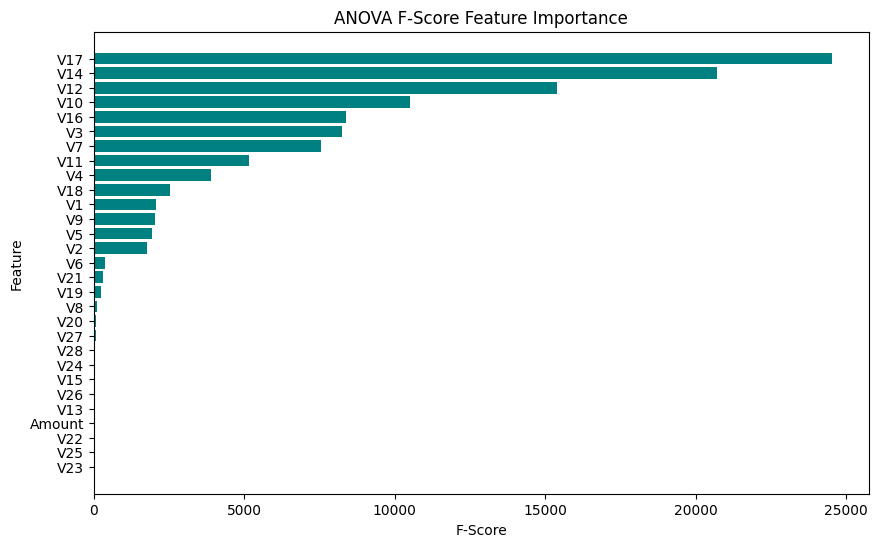

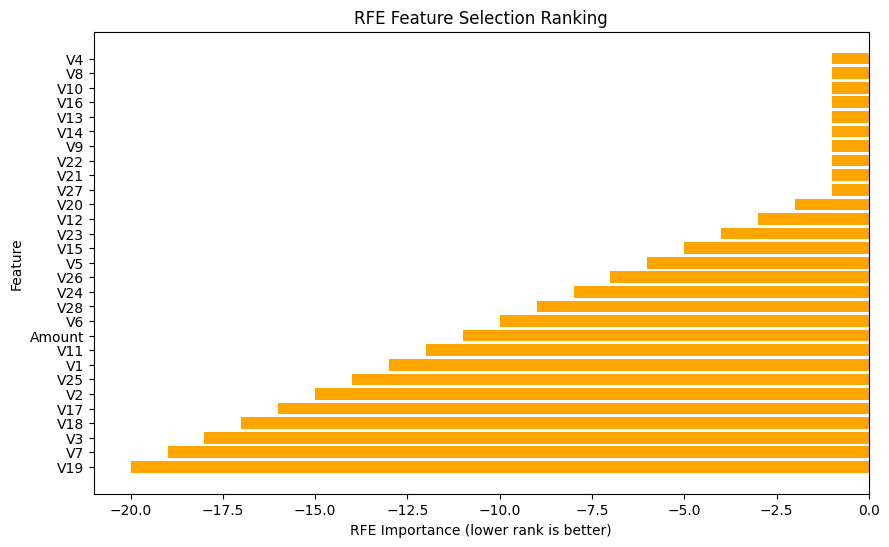

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.linear_model import LogisticRegression

# ------------------ ANOVA F-SCORE ------------------
anova_selector = SelectKBest(score_func=f_classif, k='all')
anova_selector.fit(X_train, y_train)

anova_scores = pd.DataFrame({
    'Feature': X_train.columns,
    'ANOVA_F_Score': anova_selector.scores_
}).sort_values(by='ANOVA_F_Score', ascending=False)

# Plot ANOVA F-scores
plt.figure(figsize=(10, 6))
plt.barh(anova_scores['Feature'], anova_scores['ANOVA_F_Score'], color='teal')
plt.gca().invert_yaxis()
plt.xlabel("F-Score")
plt.ylabel("Feature")
plt.title("ANOVA F-Score Feature Importance")
plt.show()


# ------------------ RFE ------------------
model = LogisticRegression(max_iter=1000, solver='lbfgs')
rfe_selector = RFE(estimator=model, n_features_to_select=10, step=1)
rfe_selector.fit(X_train, y_train)

rfe_ranking = pd.DataFrame({
    'Feature': X_train.columns,
    'RFE_Rank': rfe_selector.ranking_
}).sort_values(by='RFE_Rank')

# Plot RFE Ranking (lower is better)
plt.figure(figsize=(10, 6))
plt.barh(rfe_ranking['Feature'], -rfe_ranking['RFE_Rank'], color='orange')  # Negative so higher bar = better
plt.gca().invert_yaxis()
plt.xlabel("RFE Importance (lower rank is better)")
plt.ylabel("Feature")
plt.title("RFE Feature Selection Ranking")
plt.show()
